In [1]:
!pip install kagglehub

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

100%|██████████| 163M/163M [00:01<00:00, 89.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1


In [3]:
import shutil
shutil.move(path , '/content')

'/content/1'

In [4]:
data_dir = '/content/1/data'

In [5]:
# checking proper format
from PIL import Image
import matplotlib.pyplot as plt
import os
import imghdr
import matplotlib.image as mpimg
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as tf
from tensorflow.keras import Sequential
from keras.layers import Conv2D , Dense , MaxPooling2D , Flatten

In [6]:
print(os.listdir(data_dir))

['without_mask', 'with_mask']


In [7]:
valid_ext = ['jpeg' , 'jpg' , 'png' , 'bmp']
for img_category in os.listdir(data_dir):
    image_category = os.path.join(data_dir , img_category)
    for image in os.listdir(image_category):
        img_path = os.path.join(image_category , image)

        # image = Image.open(img_path)
        extension = imghdr.what(img_path)
        if extension in valid_ext:
            continue
        else:
            os.remove(img_path)
            print(f"Invalid extension, removing image: {img_path}")


Invalid extension, removing image: /content/1/data/with_mask/with_mask_3495.jpg
Invalid extension, removing image: /content/1/data/with_mask/with_mask_3449.jpg
Invalid extension, removing image: /content/1/data/with_mask/with_mask_3411.jpg
Invalid extension, removing image: /content/1/data/with_mask/with_mask_3360.jpg
Invalid extension, removing image: /content/1/data/with_mask/with_mask_3416.jpg


In [8]:
with_mask_file = os.listdir('/content/1/data/with_mask')
print("number of with mask files" , len(with_mask_file))

without_mask_file = os.listdir('/content/1/data/without_mask')
print("number of without mask files" , len(without_mask_file))

number of with mask files 3720
number of without mask files 3828


With mask --> 1

without mask --> 0

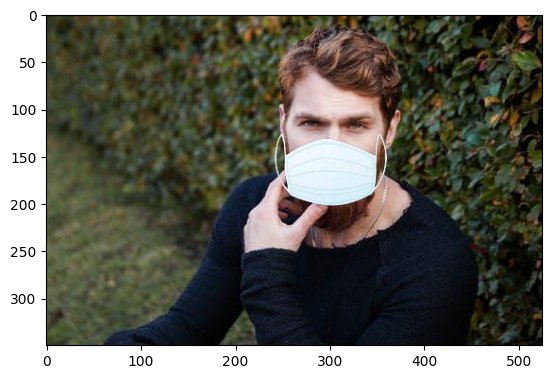

In [9]:
# open images
img = mpimg.imread('/content/1/data/with_mask/with_mask_1.jpg')
imgplot = plt.imshow(img)

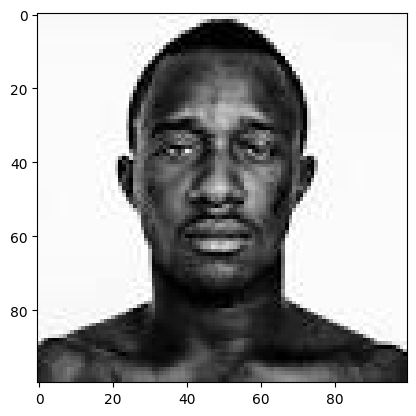

In [10]:
img = mpimg.imread('/content/1/data/without_mask/without_mask_1.jpg')
imgplot = plt.imshow(img)

In [11]:
with_mask_label = [1]*3720
without_mask_label = [0]*3828
labels = with_mask_label + without_mask_label

In [12]:
with_mask_dir = '/content/1/data/with_mask/'
without_mask_dir = '/content/1/data/without_mask/'

with_mask_files = os.listdir(with_mask_dir)
without_mask_files = os.listdir(without_mask_dir)

data = []

for image in with_mask_files:
    img = Image.open(with_mask_dir + image)
    img = img.resize((128,128))
    img = img.convert('RGB')
    img = np.array(img)
    data.append(img)

for image in without_mask_files:
    img = Image.open(without_mask_dir+image)
    img = img.resize((128,128))
    img = img.convert('RGB')
    img = np.array(img)
    data.append(img)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
X = np.array(data)
Y = np.array(labels)

In [14]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , shuffle = True , random_state=5)

In [15]:
x_train_scaled = x_train /255
x_test_scaled = x_test/255

In [16]:
number_of_classes = 2
model = Sequential()

model.add(Conv2D(256 , kernel_size=(3,3) , activation = 'relu' , input_shape = (128 , 128 , 3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(32 , activation = 'relu'))
model.add(Dense(number_of_classes , activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         401,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 777,506 (2.97 MB)

 Trainable params: 777,506 (2.97 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [19]:
hist = model.fit(x_train_scaled , y_train , validation_split = 0.2 , epochs = 10)

Epoch 1/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 38s 198ms/step - acc: 0.6726 - loss: 0.5664 - val_acc: 0.8866 - val_loss: 0.2821
Epoch 2/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - acc: 0.8801 - loss: 0.2940 - val_acc: 0.9098 - val_loss: 0.2340
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - acc: 0.9031 - loss: 0.2467 - val_acc: 0.9238 - val_loss: 0.2019
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - acc: 0.9126 - loss: 0.2196 - val_acc: 0.9247 - val_loss: 0.1854
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - acc: 0.9274 - loss: 0.1841 - val_acc: 0.9329 - val_loss: 0.1746
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - acc: 0.9436 - loss: 0.1550 - val_acc: 0.9313 - val_loss: 0.1826
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - acc: 0.9508 - loss: 0.1284 - val_acc: 0.9147 - val_loss: 0.2132
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - acc: 0.9497 - loss: 0.1239 - val_acc: 0.9296 - val_loss: 0.1755
Epoch 9/10
151/151 ━━━━━━━━━━━━━━━━━━━━

In [21]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - acc: 0.9330 - loss: 0.1954
Test Accuracy = 0.9397351145744324


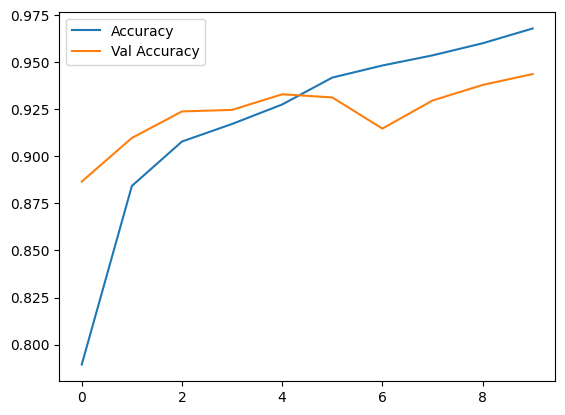

In [23]:
plt.plot(hist.history['acc'] , label = 'Accuracy')
plt.plot(hist.history['val_acc'] , label = 'Val Accuracy')
plt.legend()
plt.show()

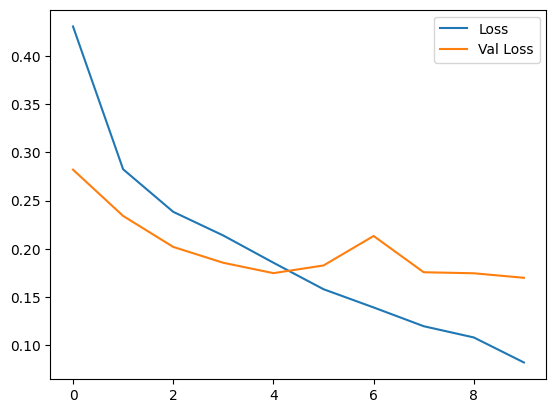

In [24]:
plt.plot(hist.history['loss'] , label = 'Loss')
plt.plot(hist.history['val_loss'] , label = 'Val Loss')
plt.legend()
plt.show()

In [25]:
model.save('model.h5')